In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)

In [3]:
# circuit.x(q[0])
# circuit.x(q[1])

circuit.h(q[0])
# circuit.h(q[1])

# circuit.rx(pi/4, q[0])
# circuit.rx(pi/4, q[1])

circuit.h(q[2])
circuit.cswap(q[2], q[1], q[0])
circuit.h(q[2])
circuit.x(q[2])

circuit.measure(q[2], c)
circuit.draw()

┌───┐                
q0_0: ┤ H ├─X──────────────
      └───┘ │              
q0_1: ──────X──────────────
      ┌───┐ │ ┌───┐┌───┐┌─┐
q0_2: ┤ H ├─■─┤ H ├┤ X ├┤M├
      └───┘   └───┘└───┘└╥┘
c0: 1/═══════════════════╩═
                         0

{'0': 260, '1': 764}


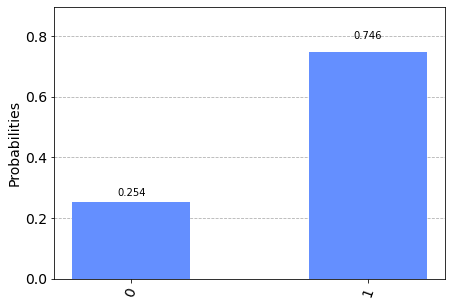

In [4]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)